In [2]:
import json

data_wmt = json.load(open("../../../computed/wmt_irt_score.json"))
data_squad_s15_n10k = json.load(open("../../../computed/squad_s15_n10k_irt_score.json"))
data_squad_s15 = json.load(open("../../../computed/squad_s15_irt_score.json"))
data_squad_s150 = json.load(open("../../../computed/squad_s150_irt_score.json"))

In [3]:
import numpy as np

def eval_irt(data):
	print(len(data["items"]), len(data["systems"]))
	print(np.average([item["a"] > 0 for item in data["items"]]))

eval_irt(data_wmt)
eval_irt(data_squad_s15)
eval_irt(data_squad_s15_n10k)
eval_irt(data_squad_s150)

1098 15
0.49635701275045535
1000 15
0.439
10000 15
0.612
1000 150
0.487


0.9541817569274825
0.458013981302114


AttributeError: 'Axes' object has no attribute 'colorbar'

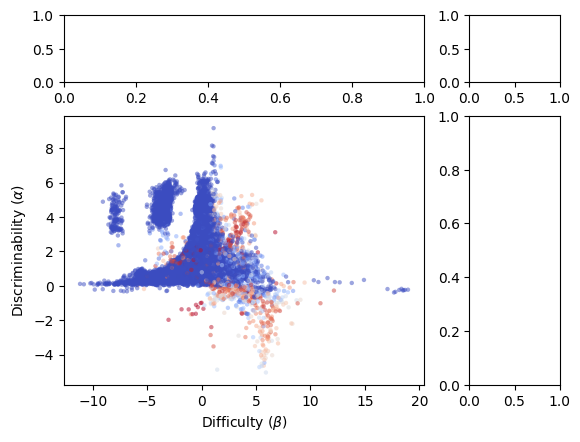

In [37]:
def plot_irt(data):
	import matplotlib as mpl
	import matplotlib.cm as cm
	import matplotlib.pyplot as plt
	
	
	cmap=cm.coolwarm_r
	norm=mpl.colors.Normalize(vmin=min(data["c"]), vmax=max(data["c"]))

	fig, axs = plt.subplots(
		ncols=2, nrows=2,
		width_ratios=(4, 1),
		height_ratios=(1, 4),
	)

	print(np.average([x > 0 for x in data["a"]]))
	print(np.average([x > 0 for x in data["b"]]))
	axs[1, 0].scatter(
		data["b"],
		data["a"],
		s=10,
		alpha=0.5,
		linewidths=0,
		color=[cmap(norm(x)) for x in data["c"]],
	)
	axs[1, 0].set_ylabel(r"Discriminability ($\alpha$)")
	axs[1, 0].set_xlabel(r"Difficulty ($\beta$)")

	fig.colorbar(
		mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
		orientation="horizontal",
		label="Feasability",
		ax=axs[0, 1]
	)
	plt.show()

plot_irt(json.load(open("../../../computed/squad_pyirt_4pl_e2k_s0.json")))
# plot_irt(json.load(open("../../../computed/wmt_pyirt.json")))